**Álgebra Lineal Computacional**

**TP 1**
---

*Integrantes:*

*   Pedro Joel Burgos - LU 804/18

*   Martín Menalled - LU 339/22

Ejercicio 1

In [1]:
import numpy as np

def descompLU(A): # Recibe una matriz y la factoriza con metodo LU sin pivoteo. 
                  # Devuelve dos matrices: L y U.
    n=A.shape[0]  # Sacamos el n de la matriz
    if np.linalg.det(A)==0:
        I=np.eye(n)
        return I,A
    else:
        if n==1:
            I=np.eye(1)
            return I, A
        else:
            if A[0,0]==0:
                return np.eye(n),A
            else:
                A11=A[0,0]
                A12=A[0,1:]
                A21=A[1:,0]
                A22=A[1:, 1:]
                L=np.zeros([n,n])
                U=np.zeros([n,n])
                L21=A21/A11
                L[1:,0] = L21
                U12=A12
                resta = L21.reshape(-1, 1) @ U12.reshape(1, -1)
                LU=A22-resta
                Ele, uu=descompLU(LU)
                L[0,0]=1
                L[1:,1:]=Ele
                U[0,0]=A11
                U[0,1:]=A12
                U[1:,1:]=uu
                for i in range(n):
                    if L[i,i]==0 or U[i,i]==0:
                        return np.eye(n),A
                return L,U

            
# Ejemplos para revisar que ande la funcion            
Matriz_eje1 = np.array([[2, -3, 5], [6, -1, 3], [-4, 1, -2]])
L, U = descompLU(Matriz_eje1)
print("Matriz L:")
print(L)
print("Matriz U:" )
print(U)
print("\n")

Matriz_eje2 = np.array([[1,1,1],[1,1,2],[1,3,5]])
L, U = descompLU(Matriz_eje2)
print("Matriz L:")
print(L)
print("Matriz U:")
print(U)


Matriz L:
[[ 1.     0.     0.   ]
 [ 3.     1.     0.   ]
 [-2.    -0.625  1.   ]]
Matriz U:
[[  2.   -3.    5. ]
 [  0.    8.  -12. ]
 [  0.    0.    0.5]]


Matriz L:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Matriz U:
[[1 1 1]
 [1 1 2]
 [1 3 5]]


Ejercicio 3

In [2]:
from scipy.linalg import solve_triangular 

# Importamos la funcion solve_triangular, 
# que dada una matriz triangular A y un vector b , 
# nos resuelve el sistema Ax=b

def resolverLU(A, b):
    L, U = descompLU(A) # Reutilizamos la funcion del punto anterior
    
    y = solve_triangular(L, b, lower=True) 
    # El vector 'y' tiene la solucion del sistema Ly=b . 
    # lower=True significa que la matriz es triangular inferior.
    
    x = solve_triangular(U, y, lower=False) 
    # El vector 'x' tiene la solucion que buscamos (de Ax=b). 
    # lower=False significa que la matriz es triangular inferior.
    
    return x 

Matriz_eje3 = np.array([[1,2,1],[2,5,1],[-1,1,2]])
Matriz_b = np.array([3,4,3])

# Ejemplo para revisar que ande la funcion  
resolverLU(Matriz_eje3,Matriz_b)

array([1., 0., 2.])

Ejercicio 4

In [3]:
from scipy.linalg import lu_factor, solve_triangular

# Creamos la matriz aleatoria A y el vector aleatorio b
# por defecto, la función np.random.rand nos devuelve numeros aleatorios
# en el intervalo [0,1)
# pero nosotros queremos que esten en el intervalo [-1,1). 
# Entonces ampliamos ese intervalo multiplicandolo por 2
# (pasamos a tener valores en el intervalo [0,2) )
# y despues desplazamos todo el intervalo hacia la izquierda restando 1
# (pasamos a tener valores en el intervalo [-1,1) como buscabamos

A = np.random.rand(10, 10) * 2 - 1
b = np.random.rand(10) * 2 - 1

# Resolvemos el sistema con la funcion del ejercicio anterior. 
# En lugar de usar ˜x , 
# llamamos 'z' al vector solucion que nos devuelve la función

z = resolverLU(A, b)

# Ahora calculamos el error relativo de b. 
# Calculamos la norma 2 de b' = Az , menos la norma 2 de b, 
# y dividimos por la norma 2 de b
# Cuando no le especificamos a la fucion linalg.norm que norma queremos,
# por defecto calcula la norma 2

e = np.linalg.norm(np.dot(A, z) - b) / np.linalg.norm(b)


print("La matriz aleatoria es:", A)
print("El vector aleatorio es:", b)
print("El error relativo es:", e)

La matriz aleatoria es: [[-0.51537379  0.29311178 -0.28580712  0.3048993  -0.93655756 -0.69236792
   0.20377245  0.31272397 -0.6862592  -0.02915193]
 [-0.52438633  0.52478889  0.17814985  0.75076707 -0.10517925 -0.6619455
   0.17472285 -0.61727718  0.61593567  0.43989077]
 [ 0.32508196  0.39654959  0.83454398  0.78438893  0.06047046 -0.76408732
   0.74634171  0.94727028 -0.33609123  0.22820992]
 [-0.08186227  0.20302857 -0.6599502   0.03378441  0.30976989  0.85652968
  -0.20458253  0.19754407 -0.09346173 -0.64967507]
 [-0.8407436   0.70399459  0.36243124  0.26152453  0.87577115 -0.24570139
  -0.53787743 -0.29610817 -0.83556242 -0.25376879]
 [-0.92682961  0.88187393  0.2990689   0.05704334 -0.4845089   0.3590277
  -0.65387929  0.70386803  0.0518333  -0.8879888 ]
 [-0.78790956 -0.89278125  0.68522222 -0.19977064 -0.92169178 -0.99599033
  -0.00578107  0.93953637 -0.31529023 -0.09002901]
 [-0.52381439  0.67107172  0.6929669   0.53057821  0.17956184  0.4203486
   0.76304747 -0.42926947  0.1

Conclusión: Tras probar el código varias veces, el error relativo nos dió mayormente valores entre 0 y 3. consideramos que este error es notable aunque va a depender del objetivo de uso que le demos a esta resolución del sistema. Seguramente la matriz se encuentra mal condicionada, es decir, que pequeñas perturbaciones en b, pueden generar grandes cambios en la solución, y también otro factor que pensamos que contribuye, es el orden de la matriz A y del vector b que al ser de un tamaño considerable, aumenta el error relativo.



Ejercicio 5

In [4]:
from scipy.linalg import solve_triangular

def inversa(A):
    
    n = A.shape[0]
    # n es el orden que tiene la matriz
    
    # Obtenemos la descomposición LU de la matriz A
    L, U = descompLU(A)
    
    # Creamos la matriz identidad de tamaño n x n
    I = np.eye(n)
    
    # Creamos una matriz para almacenar las soluciones de los sistemas 
    # Ly = v y Ux = y
    
    invA = np.zeros((n, n))
    # Creamos la matriz de respuesta con ceros.
    
    # Para cada columna de la matriz identidad,
    # resolvemos los sistemas Ly = v y Ux = y
    for i in range(n):
        v = I[:, i] # selecionamos la columna i del bucle for
        y = solve_triangular(L, v, lower=True)
        x = solve_triangular(U, y, lower=False)
        invA[:, i] = x             
    # La columna i de la matriz invA va a cargarse con la solucion x
    
    return invA # Por último devolvemos la inversa de la matriz A

Ejercicio 6

In [5]:
A = np.random.rand(10, 10) * 2 - 1  
# Generamos una matriz aleatoria de 10x10 en el intervalo [-1,1)

A_inv = inversa(A) 
# Calculamos la inversa de A con la funcion creada en el punto anterior

B = np.dot(A_inv, A)     
# producto escalar de A^(-1) * A

I = np.eye(10)           
# Generamos una matriz identidad de tamaño 10x10

e = np.linalg.norm(B - I,"fro")
# calculor error de Frobenius

print("La matriz B es:", B)
print("error en norma Frobenius es:", e)

La matriz B es: [[ 1.00000000e+00 -2.87309642e-15  4.20691989e-15 -6.08300808e-15
  -3.71794083e-16 -2.55187399e-15 -1.37300292e-15  1.00712987e-14
   3.33527238e-15  6.58325131e-15]
 [ 8.34899379e-15  1.00000000e+00  9.69385430e-15 -9.09399726e-15
  -8.08401063e-16 -6.18466419e-15 -8.90797995e-15  1.11443432e-14
   5.48010965e-16  7.33000905e-15]
 [ 6.50245392e-15 -3.52609057e-15  1.00000000e+00 -1.81002838e-15
   7.38331162e-16 -2.63638650e-15 -4.76953892e-15  1.68561583e-15
  -2.34466900e-15  1.34464849e-15]
 [-7.22761614e-15  4.29946032e-15 -5.19892952e-15  1.00000000e+00
  -1.31469545e-16  3.68114768e-15  7.84372895e-15 -1.40884871e-15
   2.32638868e-15 -1.01254414e-15]
 [ 3.32559023e-15 -2.22425198e-15  1.81732109e-15 -1.02747052e-15
   1.00000000e+00  2.49817971e-15  1.72906977e-18  2.46351712e-15
  -1.85731909e-15  9.72947747e-16]
 [-3.04950253e-15  1.30644021e-15  1.22727597e-17  2.61985768e-15
  -1.81069384e-15  1.00000000e+00  2.38852733e-16 -4.94100841e-16
   2.96251049e-15

Conclusión: Podemos notar que la matriz B que se supone que deberia dar la matriz identidad
no nos da ,y se marca un error en Frobenius, demostrando la capacidad de errores
que recaen en el programa

Ejercicio 7

In [6]:

tam_inicial = 10       # tamaño inicial de la matriz de cada iteracion
tam_final = 201        # tamaño final de la matriz de cada iteracion
cant_iteraciones = 10  # número de veces que se repite el experimento

v1 = np.zeros(tam_final)  
# creamos un vector para almacenar los errores del primer método

v2 = np.zeros(tam_final)  
# creamos un vector para almacenar los errores del segundo método

for n in range(tam_inicial,tam_final): 
    for j in range(cant_iteraciones):           
        # para el tamaño de cada matriz iteramos 10 veces
        
        # Generamos una matriz y vector aleatorios
        A = np.random.rand(n, n) * 2 - 1  
        
        # Generamos un vector aleatorio x de tamaño n
        x = np.random.rand(n) * 2 - 1
        
        # ambos en el [-1,1)
        
        b = A @ x

        # Resolvemos sistema Ax = b utilizando LU_solve
        x1 = resolverLU(A,b)

        # Calculamos el logaritmo del error relativo con el primer metodo
        err1 = np.log(np.linalg.norm(A @ x1 - b) / np.linalg.norm(b))
        
        # Resolvemos el sistema Ax = b utilizando la inversa de A
        x2 = inversa(A) @ b

        # Calculamos el logaritmo del error relativo con el segundo metodo
        err2 = np.log(np.linalg.norm(A @ x2 - b) / np.linalg.norm(b))

        # Sumamos el error al vector correspondiente
        v1[n] += err1
        v2[n] += err2

# v1 y v2 van a tener 201 elementos. 
# Los primeros 10 elementos de cada vector van a tener ceros
# porque n empieza desde 10

Ejercicio 7

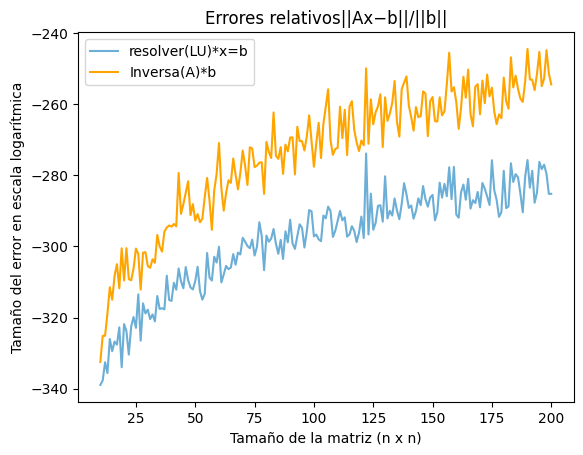

In [7]:
import matplotlib.pyplot as plt

n = np.arange(10, len(v1))
plt.plot(n, v1[10:], label='resolver(LU)*x=b', color='#6baed6')
plt.plot(n, v2[10:], label='Inversa(A)*b', color='orange')
plt.title("Errores relativos||Ax−b||/||b||" )
plt.legend()
plt.xlabel("Tamaño de la matriz (n x n)")
plt.ylabel("Tamaño del error en escala logarítmica")
plt.show()

Conclusion: La resolución del sistema a través de la función resolverLU tiene menor error relativo que hacerlo mediante la inversa. Con el crecimiento del tamaño de la matriz el tamaño crece de forma proporcionada entre ambas posibilidades.

Ejercicio 8

In [8]:

tam_inicial = 10       # Tamaño inicial de la matriz en cada iteración
tam_final = 201        # Tamaño final de la matriz en cada iteración
cant_iteraciones = 10  # Número de veces que se repite el experimento

v1 = np.zeros(tam_final)  
# Vector para almacenar los errores relativos del primer método

v2 = np.zeros(tam_final)
# Vector para almacenar los errores relativos del segundo método


for n in range(tam_inicial, tam_final):
    for j in range(cant_iteraciones):
        # Para cada tamaño de matriz, iteramos 10 veces
        
        # Generamos una matriz y un vector aleatorios
        A = np.random.rand(n, n) * 2 - 1

        # Generamos un vector aleatorio x de tamaño n con valores en el intervalo [-1, 1)
        x = np.random.rand(n) * 2 - 1

        b = A @ x

        # Resolvemos el sistema Ax = b utilizando LU_solve
        x1 = resolverLU(A, b)

        # Calculamos el error relativo con el primer método
        err1 =np.log( np.linalg.norm(x1 - x) / np.linalg.norm(x))

        # Resolvemos el sistema Ax = b utilizando la inversa de A
        x2 = inversa(A) @ b

        # Calculamos el error relativo con el segundo método
        err2 =np.log( np.linalg.norm(x2 - x) / np.linalg.norm(x))

        # Sumamos el error relativo al vector correspondiente
        v1[n] += err1
        v2[n] += err2




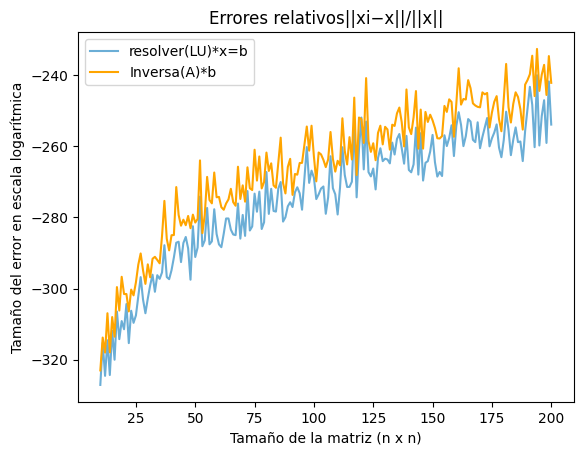

In [9]:


n = np.arange(10, len(v1))
plt.plot(n, v1[10:], label='resolver(LU)*x=b', color='#6baed6')
plt.plot(n, v2[10:], label='Inversa(A)*b', color='orange')
plt.title("Errores relativos||xi−x||/||x||" )
plt.legend()
plt.xlabel("Tamaño de la matriz (n x n)")
plt.ylabel("Tamaño del error en escala logarítmica")
plt.show()

Conclusion: Se observa un comportamiento de cada función similar pero con menor 
distancia entre el error de un método y del otro.
Por otro lado, error del resolverLU es muchisimo mas grande.

Ejercicio 9

In [11]:
tam_inicial = 10       # tamaño inicial de la matriz de cada iteracion
tam_final = 201        # tamaño final de la matriz de cada iteracion
cant_iteraciones = 10  # número de veces que se repite el experimento

v3 = np.zeros(tam_final)
v3x = np.zeros(tam_final) 
# creamos un vector para almacenar los errores del primer método
v4 = np.zeros(tam_final) 
v4x = np.zeros(tam_final) 
# creamos un vector para almacenar los errores del segundo método

for n in range(tam_inicial,tam_final):
    for j in range(cant_iteraciones):            # para el tamaño de cada matriz iteramos 10 veces
        # Generamos una matriz y vector aleatorios
        A = np.random.rand(n, n) * 2 - 1  
        
        # Generamos un vector aleatorio x de tamaño n con valores en el intervalo [-1, 1)
        x = np.random.rand(n) * 2 - 1
        b = A @ x

        # Resolvemos sistema Ax = b utilizando LU_solve
        x1 = np.linalg.solve(A,b)

        # Calculamos el logaritmo del error relativo con el primer metodo
        err1 = np.log(np.linalg.norm(A @ x1 - b) / np.linalg.norm(b))
        err1x =np.log( np.linalg.norm(x1 - x) / np.linalg.norm(x))
        
        # Resolvemos el sistema Ax = b utilizando la inversa de A
        x2 = np.linalg.inv(A) @ b

        # Calculamos el logaritmo del error relativo con el segundo metodo
        err2 = np.log(np.linalg.norm(A @ x2 - b) / np.linalg.norm(b))
        err2x =np.log( np.linalg.norm(x2 - x) / np.linalg.norm(x))

        # Sumamos el error al vector correspondiente
        v3[n]  += err1
        v3x[n] += err1x
        v4[n]  += err2
        v4x[n] += err2x
        
 

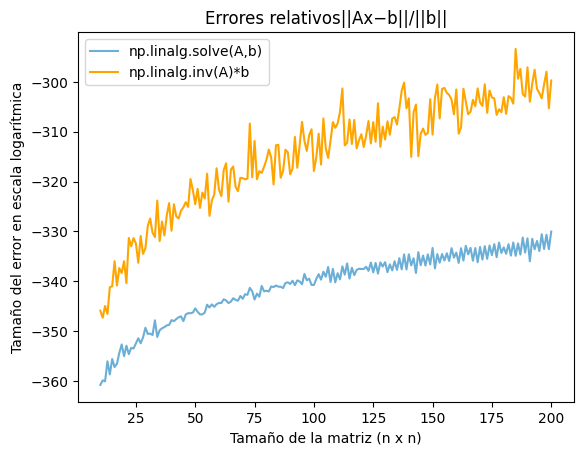

In [12]:


n = np.arange(10, len(v1))
plt.plot(n, v3[10:], label='np.linalg.solve(A,b)', color='#6baed6')
plt.plot(n, v4[10:], label='np.linalg.inv(A)*b', color='orange')
plt.title("Errores relativos||Ax−b||/||b||" )
plt.legend()
plt.xlabel("Tamaño de la matriz (n x n)")
plt.ylabel("Tamaño del error en escala logarítmica")
plt.show()

Conclusion: Se observan comportamientos similares en cuánto a cuál método es el más eficiente pero con un tamaño de error mucho menor en ambos casos. Además la función solve tiene claramente mucha menor error (la curva se aplana mucho antes). Además de esto, el tiempo de ejecución fue mucho menor que con la función creada.

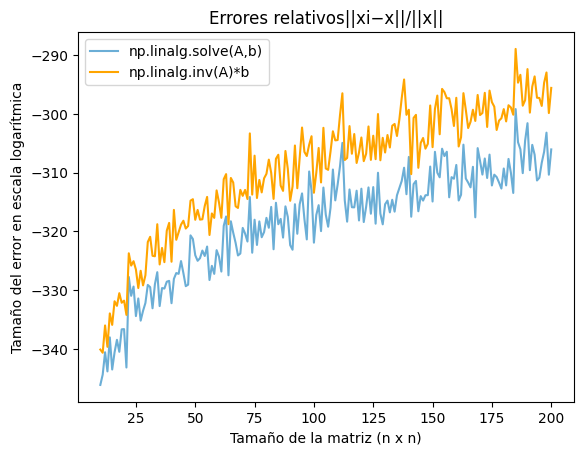

In [13]:
n = np.arange(10, len(v1))
plt.plot(n, v3x[10:], label='np.linalg.solve(A,b)', color='#6baed6')
plt.plot(n, v4x[10:], label='np.linalg.inv(A)*b', color='orange')
plt.title("Errores relativos||xi−x||/||x||" )
plt.legend()
plt.xlabel("Tamaño de la matriz (n x n)")
plt.ylabel("Tamaño del error en escala logarítmica")
plt.show()

Conclusion: similar a los anteriores casos , la diferencia los errores relativos no es tanta pero a diferencia del anterior grafico el error relativo usando de x usando solo np.linalg.solve es muchisimo mas alto y prolongado. 

Ejercicio 10

In [14]:


# Define una función para calcular el número de condición de una matriz
def calcular_numero_condicion(A):
    return np.linalg.cond(A)

# Configurar los parámetros del experimento
tam_inicial = 2
tam_final = 21  # Como quieres incluir n = 20
cant_iteraciones = 10

v1 = np.zeros(tam_final)  
# Vector para almacenar los errores relativos del primer método

v2 = np.zeros(tam_final)
# Vector para almacenar los errores relativos del segundo método


# Iterar a través de los valores de n desde 2 hasta 20
for n in range(tam_inicial, tam_final):
    # Crear la matriz A utilizando la fórmula dada
    A = np.zeros((n, n))
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            A[i - 1, j - 1] = 1 / (i + j - 1)
            # lo que pide el enuciado

    # Calcular el número de condición de A
    cond_A = calcular_numero_condicion(A)
    print(f"La matriz A para n={n} tiene un número de condición: {cond_A}")


    # Repetir el experimento cant_iteraciones veces para cada valor de n
    for j in range(cant_iteraciones):
        # Generar un vector x de tamaño n con valores aleatorios en el rango [-1, 1)
        x = np.random.rand(n) * 2 - 1
        
        # Calcular el vector b como el producto matriz-vector A @ x
        b = np.dot(A, x)

        # Resolver el sistema lineal Ax = b utilizando dos métodos diferentes:

        # Método 1: Resolver utilizando la función resolverLU
        x1 = resolverLU(A, b)

        # Método 2: Resolver utilizando la función inversa
        x2 = inversa(A) @ b

        # Calcular el error relativo de las soluciones obtenidas por cada método
        err1 = np.log(np.linalg.norm(np.dot(A, x1) - b) / np.linalg.norm(b))
        err2 = np.log(np.linalg.norm(np.dot(A, x2) - b) / np.linalg.norm(b))

        # Acumular los errores en los vectores v1 y v2 para su posterior análisis
        v1[n] += err1
        v2[n] += err2

# Los resultados están listos para su análisis


La matriz A para n=2 tiene un número de condición: 19.28147006790397
La matriz A para n=3 tiene un número de condición: 524.0567775860644
La matriz A para n=4 tiene un número de condición: 15513.73873892924
La matriz A para n=5 tiene un número de condición: 476607.2502422816
La matriz A para n=6 tiene un número de condición: 14951058.641320305
La matriz A para n=7 tiene un número de condición: 475367356.7411424
La matriz A para n=8 tiene un número de condición: 15257575462.227404
La matriz A para n=9 tiene un número de condición: 493154128042.00494
La matriz A para n=10 tiene un número de condición: 16024540559491.854
La matriz A para n=11 tiene un número de condición: 522518323284632.1
La matriz A para n=12 tiene un número de condición: 1.7966315359860738e+16
La matriz A para n=13 tiene un número de condición: 7.733240370727108e+17


C:\Users\Burgo\AppData\Local\Temp\ipykernel_8580\4003034541.py:48: RuntimeWarning: divide by zero encountered in log
  err1 = np.log(np.linalg.norm(np.dot(A, x1) - b) / np.linalg.norm(b))
C:\Users\Burgo\AppData\Local\Temp\ipykernel_8580\4003034541.py:49: RuntimeWarning: divide by zero encountered in log
  err2 = np.log(np.linalg.norm(np.dot(A, x2) - b) / np.linalg.norm(b))


La matriz A para n=14 tiene un número de condición: 4.8534320574250074e+17
La matriz A para n=15 tiene un número de condición: 2.26208375469606e+17
La matriz A para n=16 tiene un número de condición: 8.781880927991526e+17
La matriz A para n=17 tiene un número de condición: 8.878943985645243e+17
La matriz A para n=18 tiene un número de condición: 8.469484437204447e+17
La matriz A para n=19 tiene un número de condición: 1.266557611092625e+18
La matriz A para n=20 tiene un número de condición: 1.2699042052318198e+19


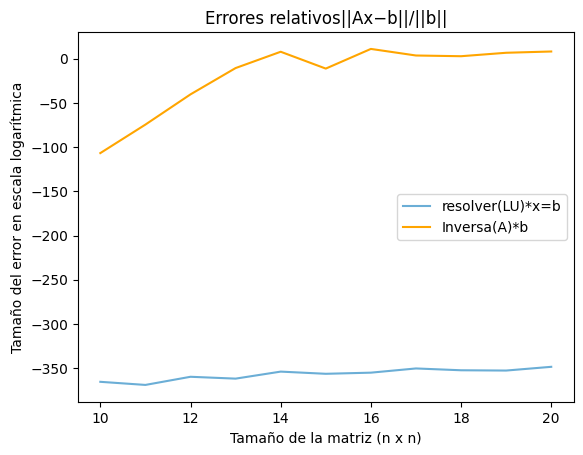

In [15]:


n = np.arange(10, len(v1))
plt.plot(n, v1[10:], label='resolver(LU)*x=b', color='#6baed6')
plt.plot(n, v2[10:], label='Inversa(A)*b', color='orange')
plt.title("Errores relativos||Ax−b||/||b||" )
plt.legend()
plt.xlabel("Tamaño de la matriz (n x n)")
plt.ylabel("Tamaño del error en escala logarítmica")
plt.show()

Cuanto mas veces aumenta n mas chico es el numero de condicion pero si hablamos de errores la inversa aumenta de manera algo plana pero segura por cada vez que aumenta la matriz pero el de resolver queda casi siempre lineal.

CONCLUSIONES FINAL:
Las conclusiones que podemos ir sacando del trabajo es que hay una diferencia 
bastante notoria entre las funciones que podemos hacer o las que ya vienen integradas en el mismo python debido a que arrastran cierto tipo de error y dependiendo del tipo de variable que tengamos o que se este barajando en la memoria puede o no maximizarse esas diferencias.

    
    